In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled, X_test_scaled = X_train, X_test

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [4]:
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Results
Accuracy: 0.956140350877193

Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [6]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.956140350877193


worst area              0.140016
worst concave points    0.129530
worst radius            0.097696
mean concave points     0.090885
worst perimeter         0.072226
mean perimeter          0.069574
mean radius             0.068676
mean concavity          0.057638
mean area               0.049172
worst concavity         0.034340
dtype: float64


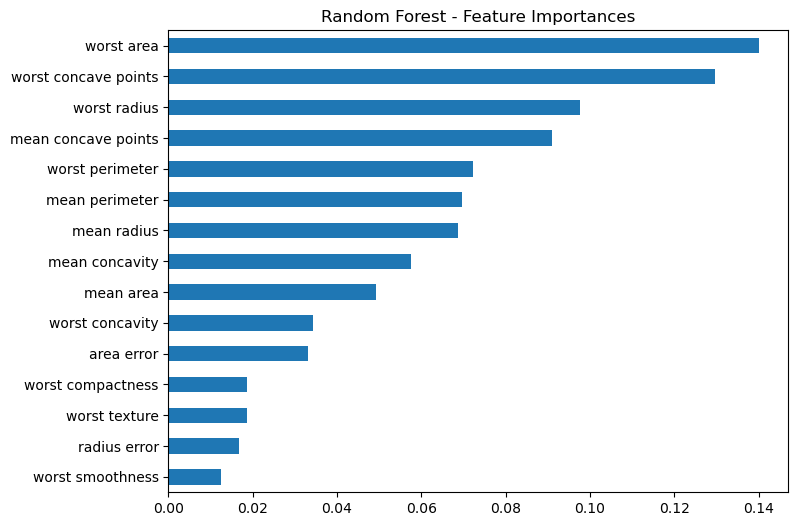

In [7]:
importances = pd.Series(rf.feature_importances_, index=X.columns)

print(importances.sort_values(ascending=False).head(10))

importances.sort_values(ascending=True).tail(15).plot(kind="barh", figsize=(8,6), title="Random Forest - Feature Importances")
plt.show()

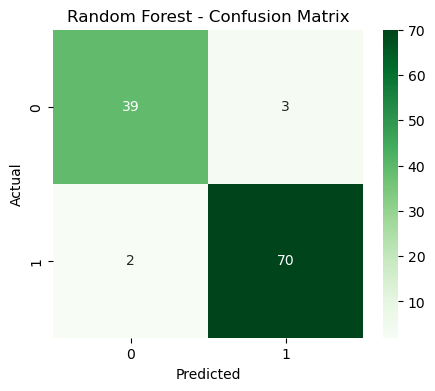

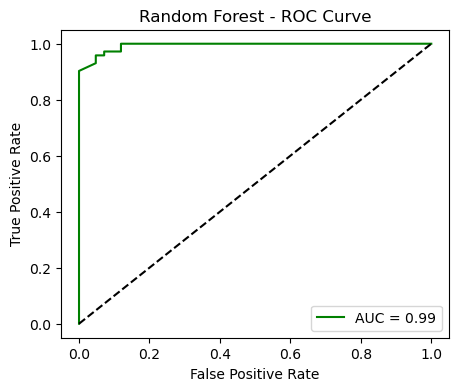

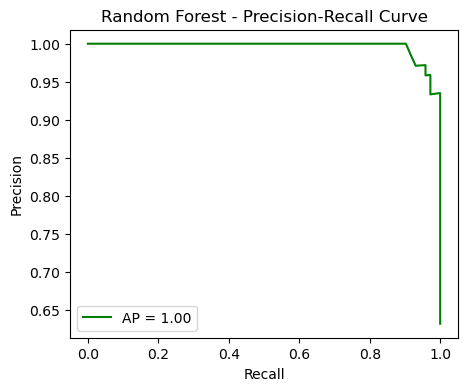

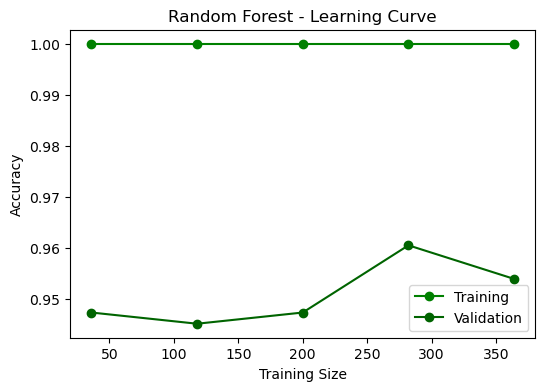

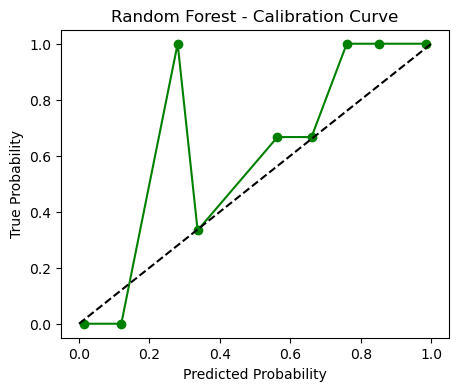

In [8]:
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="green")
plt.plot([0,1],[0,1],"k--")
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
ap = average_precision_score(y_test, y_proba_rf)
plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"AP = {ap:.2f}", color="green")
plt.title("Random Forest - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_scaled, y_train, cv=5, scoring="accuracy"
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training", color="green")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation", color="darkgreen")
plt.title("Random Forest - Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

prob_true, prob_pred = calibration_curve(y_test, y_proba_rf, n_bins=10)
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', color="green")
plt.plot([0,1],[0,1], 'k--')
plt.title("Random Forest - Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.show()